In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style='darkgrid', palette='muted')
plt.rcParams['figure.dpi'] = 120

results = pd.read_csv('../results/metrics/alpha_sweep.csv')
results.head()

,alpha,val_accuracy,val_f1_not_liked,val_f1_liked,cold_accuracy,cold_f1_not_liked,cold_f1_liked,estab_accuracy,estab_f1_not_liked,estab_f1_liked
0,0.001000,0.879733,0.707665,0.924294,0.884956,0.739480,0.926179,0.878019,0.640097,0.926565
1,0.001343,0.879733,0.707665,0.924294,0.884956,0.739480,0.926179,0.878019,0.640097,0.926565
2,0.001805,0.879700,0.707608,0.924271,0.884956,0.739480,0.926179,0.877916,0.639903,0.926499
3,0.002424,0.879667,0.707550,0.924249,0.884956,0.739480,0.926179,0.877814,0.639710,0.926433
4,0.003257,0.879567,0.707331,0.924184,0.884885,0.739277,0.926137,0.877609,0.639324,0.926300


## Prior sensitivity — effect of alpha on MNB performance

alpha=0 is pure MLE. As alpha grows the Dirichlet prior dominates and word
probabilities are smoothed toward uniform. The sweet spot balances fitting
the data against regularising rare words.

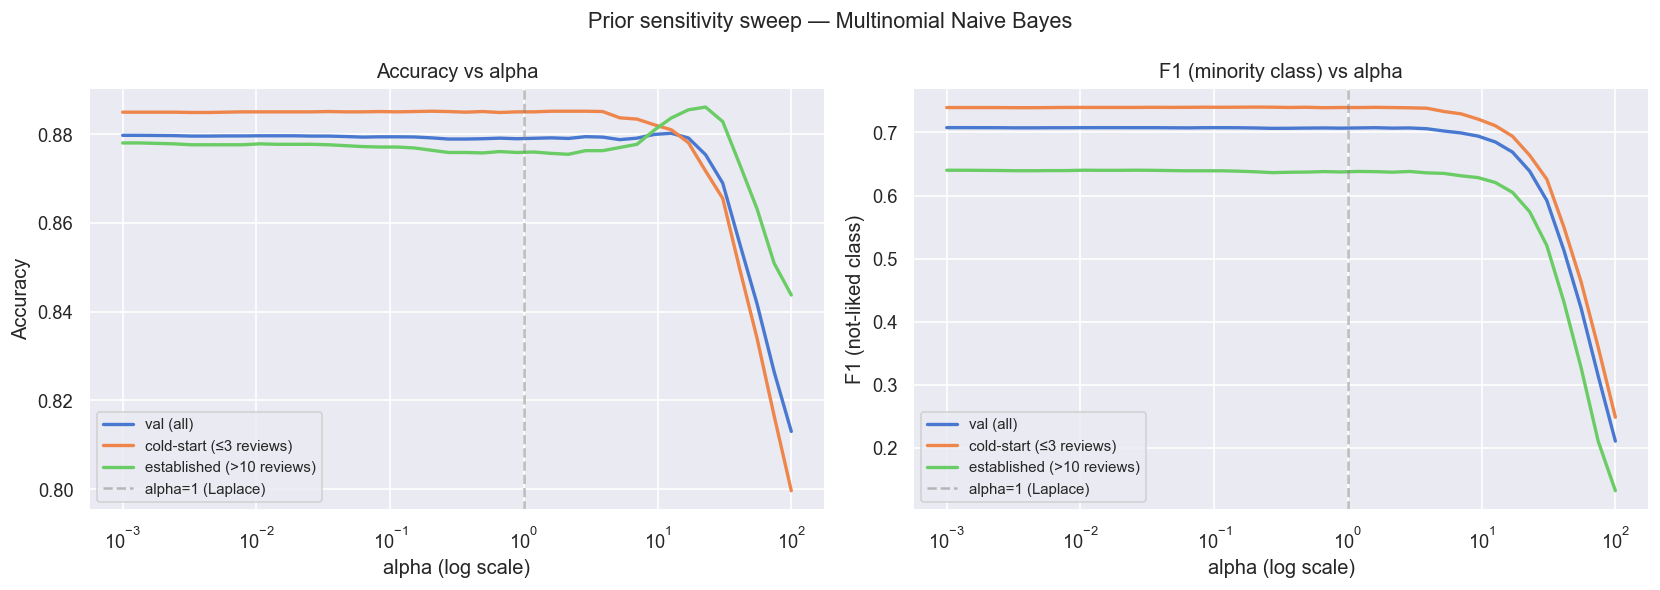

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
for col, label in [('val_accuracy', 'val (all)'),
                   ('cold_accuracy', 'cold-start (≤3 reviews)'),
                   ('estab_accuracy', 'established (>10 reviews)')]:
    axes[0].plot(results['alpha'], results[col], label=label, linewidth=2)

axes[0].set_xscale('log')
axes[0].set_xlabel('alpha (log scale)')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy vs alpha')
axes[0].axvline(1.0, color='grey', linestyle='--', alpha=0.5, label='alpha=1 (Laplace)')
axes[0].legend(fontsize=9)

# F1 on minority class (not-liked)
for col, label in [('val_f1_not_liked', 'val (all)'),
                   ('cold_f1_not_liked', 'cold-start (≤3 reviews)'),
                   ('estab_f1_not_liked', 'established (>10 reviews)')]:
    axes[1].plot(results['alpha'], results[col], label=label, linewidth=2)

axes[1].set_xscale('log')
axes[1].set_xlabel('alpha (log scale)')
axes[1].set_ylabel('F1 (not-liked class)')
axes[1].set_title('F1 (minority class) vs alpha')
axes[1].axvline(1.0, color='grey', linestyle='--', alpha=0.5, label='alpha=1 (Laplace)')
axes[1].legend(fontsize=9)

plt.suptitle('Prior sensitivity sweep — Multinomial Naive Bayes', fontsize=13)
plt.tight_layout()
plt.savefig('../results/figures/alpha_sweep.png', bbox_inches='tight')
plt.show()

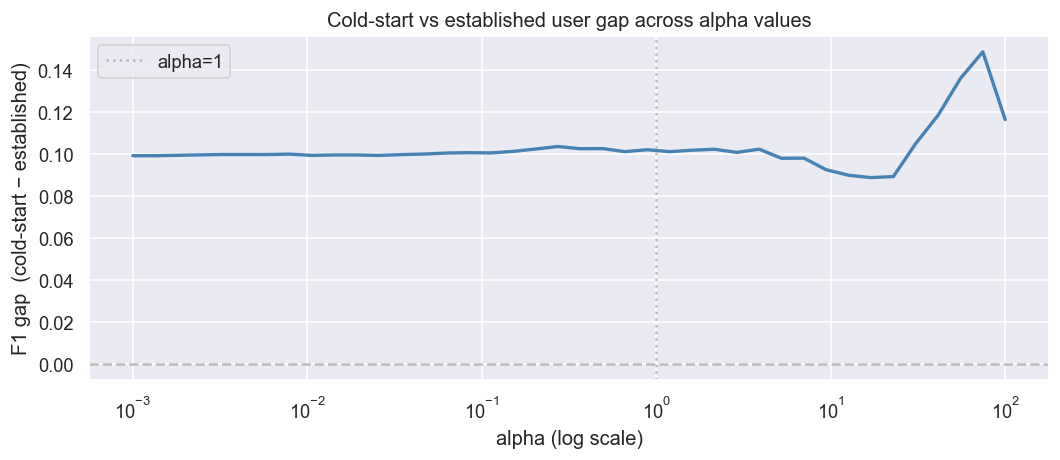

In [4]:
# Highlight the gap between cold-start and established users
results['cold_estab_f1_gap'] = results['cold_f1_not_liked'] - results['estab_f1_not_liked']

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(results['alpha'], results['cold_estab_f1_gap'], color='steelblue', linewidth=2)
ax.axhline(0, color='grey', linestyle='--', alpha=0.5)
ax.axvline(1.0, color='grey', linestyle=':', alpha=0.5, label='alpha=1')
ax.set_xscale('log')
ax.set_xlabel('alpha (log scale)')
ax.set_ylabel('F1 gap  (cold-start − established)')
ax.set_title('Cold-start vs established user gap across alpha values')
ax.legend()
plt.tight_layout()
plt.savefig('../results/figures/cold_estab_gap.png', bbox_inches='tight')
plt.show()